# 載入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# 資料輸入

In [2]:
data_art=pd.read_csv('articles.csv',header=0,
# Make sure article_id is being loading in as a string
    dtype={'article_id': str})

data_cus=pd.read_csv('customers.csv',header=0)

data_tran=pd.read_csv('transactions_train.csv',header=0,
# Make sure article_id is being loading in as a string
    dtype={'article_id': str})

# 空值處理

In [3]:
#統計空值欄位
print('data_art')
print(data_art.isnull().sum())
print('data_cus')
print(data_cus.isnull().sum())
print('data_tran')
print(data_tran.isnull().sum())

data_art
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64
data_cus
customer_id                    0
FN                        895050
Act

## 填補（天真）預測法

In [4]:
#類別資料：頻率高
#欄位FN     流行電子報訂閱(null,1) 將null轉為0
#欄位Active 論壇活動狀況(null,1)   將null轉為0
#欄位club_member_status 會員狀態 空值轉為None
data_cus.FN = data_cus.FN.fillna(0)
data_cus.Active = data_cus.Active.fillna(0)
data_cus.club_member_status = data_cus.club_member_status.fillna('None')
print(data_cus.FN.value_counts())
print(data_cus.Active.value_counts())
print(data_cus.club_member_status.value_counts())

0.0    895050
1.0    476930
Name: FN, dtype: int64
0.0    907576
1.0    464404
Name: Active, dtype: int64
ACTIVE        1272491
PRE-CREATE      92960
None             6062
LEFT CLUB         467
Name: club_member_status, dtype: int64


## 插補法

In [5]:
#數值資料：插補 age 中位數
data_cus.age = data_cus.age.fillna((data_cus['age'].median())) # median()
data_cus=pd.DataFrame(data_cus)
data_cus

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


## 異常值處理

In [6]:
#發現異常值，有三個No data
data_cus['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [7]:
#將No data統一更改為None
data_cus.loc[~data_cus['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
data_cus['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [8]:
print(data_cus.isnull().sum())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64


# 增加欄位

## 年齡分群

In [9]:
age_class=[]
for i in range(len(data_cus['age'])):
    if data_cus['age'][i] <= 25:
        age_class.append("1")
    elif data_cus['age'][i] > 25 and data_cus['age'][i] <= 35:
        age_class.append("2")    
    elif data_cus['age'][i] > 35 and data_cus['age'][i] <= 45:
        age_class.append("3")
    elif data_cus['age'][i] > 45 and data_cus['age'][i] <= 55:
        age_class.append("4")
    elif data_cus['age'][i] > 55:
        age_class.append("5")

In [10]:
data_cus['age_class'] = age_class #然後合併
data_cus

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_class
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,4
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,4
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,4
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1


## 特徵分群

In [11]:
#根據顧客購買過的商品，依照『index_group_name』特徵區分
sex_category = data_art[['index_group_no','index_group_name']].reset_index()
sex_category.index_group_name.value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [12]:
#建立新表放入article_id,index_group_no並改名
articles_category_df = pd.DataFrame(data_art[["article_id", "index_group_no"]])
articles_category_df.columns = ["article_id", "sex_attribute"]
articles_category_df

,article_id,sex_attribute
0,0108775015,1
1,0108775044,1
2,0108775051,1
3,0110065001,1
4,0110065002,1
...,...,...
105537,0953450001,3
105538,0953763001,1
105539,0956217002,1
105540,0957375001,2


In [13]:
#合併transactions
transactions_df = pd.merge(data_tran, articles_category_df, on = "article_id", how = "left")
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2,1
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,1


In [14]:
#根據顧客購買過的商品，加總特徵分數
customer_sex = transactions_df[["customer_id", "sex_attribute", "article_id"]].groupby(["customer_id","sex_attribute"]).count().unstack()
customer_sex.columns = ["Woman", "Young", "Man", "Have-kids", "Sports-person"]
customer_sex

,Woman,Young,Man,Have-kids,Sports-person
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,13.0,2.0,1.0,5.0,NaN
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,62.0,19.0,NaN,4.0,1.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,12.0,1.0,4.0,NaN,1.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,NaN,NaN,2.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,11.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,46.0,NaN,1.0,NaN,4.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,27.0,48.0,2.0,7.0,NaN
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,19.0,18.0,5.0,NaN,3.0


In [15]:
#取最大值作為該顧客的特徵
customer_sex["attribute"] = customer_sex.apply(lambda x : list(x[x == x.max()].index), axis=1)
customer_sex

,Woman,Young,Man,Have-kids,Sports-person,attribute
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,13.0,2.0,1.0,5.0,NaN,[Woman]
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,62.0,19.0,NaN,4.0,1.0,[Woman]
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,12.0,1.0,4.0,NaN,1.0,[Woman]
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,NaN,NaN,2.0,[Sports-person]
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,11.0,NaN,NaN,NaN,2.0,[Woman]
...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,46.0,NaN,1.0,NaN,4.0,[Woman]
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,27.0,48.0,2.0,7.0,NaN,[Young]
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,19.0,18.0,5.0,NaN,3.0,[Woman]


In [16]:
#篩選客戶及特徵欄位
customer_sex1 = pd.DataFrame(customer_sex[["attribute"]]).reset_index()
customer_sex1["attribute"] = customer_sex1["attribute"].apply(",".join).astype(str)
del customer_sex
customer_sex1
#確認內容,結果發現有的customer有多重屬性(最大值有多個相同)

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,Woman
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,Young
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Woman
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,Young


<function matplotlib.pyplot.show(close=None, block=None)>

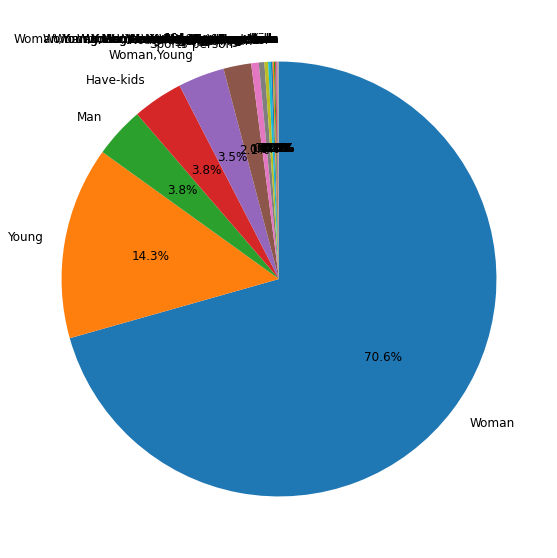

In [17]:
#繪製圓餅圖，發現70.6%的客戶只購買woman的商品
temp = customer_sex1["attribute"].value_counts().index.to_list()
plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 12
plt.pie(customer_sex1["attribute"].value_counts().sort_values(ascending=False), 
        labels = temp, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [18]:
##將有重複特徵的顧客歸類為Woman
customer_sex1.loc[~((customer_sex1["attribute"] == "Woman") | 
               (customer_sex1["attribute"] == "Young")  |
               (customer_sex1["attribute"] == "Man")    |
               (customer_sex1["attribute"] == "Have-kids") |
               (customer_sex1["attribute"] == "Sports-person")), "attribute"] = "Woman"
customer_sex1 

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,Woman
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,Young
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Woman
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,Young


In [19]:
#合併特徵至客戶資料表data_cus
data_cus = pd.merge(data_cus, customer_sex1, on ="customer_id", how="left")
data_cus

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_class,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,4,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,4,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,4,Woman
...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,Woman
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,Young
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1,Woman
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1,Young


<function matplotlib.pyplot.show(close=None, block=None)>

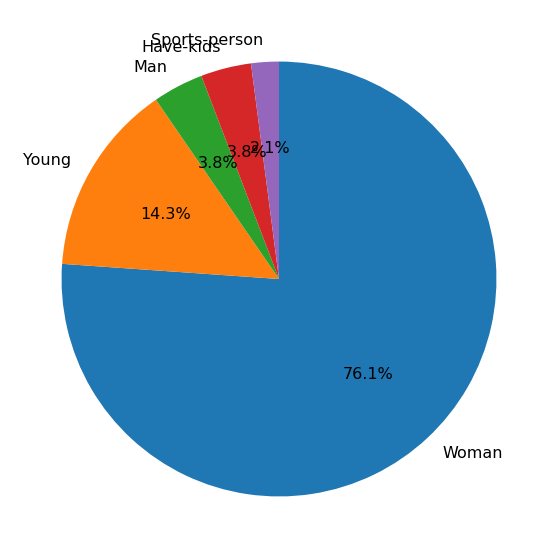

In [20]:
#繪製圓餅圖，發現有特徵的客戶76.1%為woman
temp2 = data_cus["attribute"].value_counts().index.to_list()
plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 16
plt.pie(data_cus["attribute"].value_counts().sort_values(ascending=False), 
        labels = temp2, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [21]:
#有9699個客戶沒有此特徵，為空值
print(data_cus.isnull().sum())

customer_id                  0
FN                           0
Active                       0
club_member_status           0
fashion_news_frequency       0
age                          0
postal_code                  0
age_class                    0
attribute                 9699
dtype: int64


In [22]:
#woman占了76.1%，因此以woman填補為空值
data_cus["attribute"].fillna("Woman", inplace = True)
data_cus.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
age_class                 0
attribute                 0
dtype: int64

## 季節欄位

In [23]:
#創造月份欄位
data_tran.t_dat = pd.to_datetime( data_tran.t_dat )
data_tran['Month'] = data_tran['t_dat'].dt.month.astype('int16')
data_tran

,t_dat,customer_id,article_id,price,sales_channel_id,Month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,9
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2,9
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2,9
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2,9
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2,9
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,9
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,9


In [24]:
'''
根據月份區分季節
春天3、4、5月
夏天6、7、8月
秋天9、10、11月
冬天12、1、2月
'''
Month_class=[]
for i in data_tran['Month']:
    if i==3 or i==4 or i==5:
        Month_class.append('Spring')
    elif i==6 or i==7 or i==8:
        Month_class.append('Summer')
    elif i==9 or i==10 or i==11:
        Month_class.append('Fall')
    elif i==12 or i==1 or i==2:
        Month_class.append('Winter')

In [25]:
#合併季節至交易表data_tran
data_tran['Season'] = Month_class
data_tran

,t_dat,customer_id,article_id,price,sales_channel_id,Month,Season
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,9,Fall
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,9,Fall
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,9,Fall
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2,9,Fall
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2,9,Fall
...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2,9,Fall
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2,9,Fall
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,9,Fall
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,9,Fall


# 資料挑選

## 商品挑選

In [26]:
'''
#匯入各年度秋季排行
df2018 = pd.read_csv('Fall_2018_top.csv',header=0,
    dtype={'article_id': str})
df2019 = pd.read_csv('Fall_2019_top.csv',header=0,
    dtype={'article_id': str})
df2020 = pd.read_csv('Fall_2020_top.csv',header=0,
    dtype={'article_id': str})

#篩選各年度Fall銷量>100的article
filt2018 = (df2018['rating'] >= 100)
filt2019 = (df2019['rating'] >= 100)
filt2020 = (df2020['rating'] >= 100)
Top100_2018 = df2018.loc[filt2018]
Top100_2018=Top100_2018.rename({'rating':"Fall_2018"}, axis=1)
Top100_2019 = df2019.loc[filt2019]
Top100_2019=Top100_2019.rename({'rating':"Fall_2019"}, axis=1)
Top100_2020 = df2020.loc[filt2020]
Top100_2020=Top100_2020.rename({'rating':"Fall_2020"}, axis=1)

#inner每年度Fall銷量均有>100的article
df = pd.merge(Top100_2018,Top100_2019,on='article_id',how='inner')
df = pd.merge(df,Top100_2020,on='article_id',how='inner')
All_Fall_sale100_art = ['article_id']
All_Fall_sale100_art 
'''

'\n#匯入各年度秋季排行\ndf2018 = pd.read_csv(\'Fall_2018_top.csv\',header=0,\n    dtype={\'article_id\': str})\ndf2019 = pd.read_csv(\'Fall_2019_top.csv\',header=0,\n    dtype={\'article_id\': str})\ndf2020 = pd.read_csv(\'Fall_2020_top.csv\',header=0,\n    dtype={\'article_id\': str})\n\n#篩選各年度Fall銷量>100的article\nfilt2018 = (df2018[\'rating\'] >= 100)\nfilt2019 = (df2019[\'rating\'] >= 100)\nfilt2020 = (df2020[\'rating\'] >= 100)\nTop100_2018 = df2018.loc[filt2018]\nTop100_2018=Top100_2018.rename({\'rating\':"Fall_2018"}, axis=1)\nTop100_2019 = df2019.loc[filt2019]\nTop100_2019=Top100_2019.rename({\'rating\':"Fall_2019"}, axis=1)\nTop100_2020 = df2020.loc[filt2020]\nTop100_2020=Top100_2020.rename({\'rating\':"Fall_2020"}, axis=1)\n\n#inner每年度Fall銷量均有>100的article\ndf = pd.merge(Top100_2018,Top100_2019,on=\'article_id\',how=\'inner\')\ndf = pd.merge(df,Top100_2020,on=\'article_id\',how=\'inner\')\nAll_Fall_sale100_art = [\'article_id\']\nAll_Fall_sale100_art \n'

## 客戶挑選

In [27]:
#匯入挑選好的商品表
All_Fall_sale100_art  = pd.read_csv('All_Fall_sale100_art .csv',header=0,
    dtype={'article_id': str})
All_Fall_sale100_art 

,article_id
0,0562245001
1,0399223001
2,0562245018
3,0610776002
4,0484398001
...,...
239,0417951001
240,0395127001
241,0664074007
242,0695632001


In [28]:
#篩選需要的欄位，y為Buy，1是有購買、0是沒有購買
df_tran = data_tran[['customer_id','article_id']]
df_tran['Buy'] = 1
df_tran

C:\Users\a2751\AppData\Local\Temp\ipykernel_13976\3713273284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tran['Buy'] = 1


,customer_id,article_id,Buy
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,1
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,1
...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,1
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,1
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,1
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,1


In [29]:
#篩選符合All_Fall_sale100_art的交易
df_tran = pd.merge(df_tran,All_Fall_sale100_art,on='article_id',how='inner')
df_tran

,customer_id,article_id,Buy
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0377277001,1
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0377277001,1
2,04a183a27a6877e560e1025216d0a3b40d88668c68366d...,0377277001,1
3,acc241d1fa741176872220554edc844116b4a74780579b...,0377277001,1
4,0f97a4035dd04811151b44b3e47fb60691d5035493f9d8...,0377277001,1
...,...,...,...
1798410,e7a232120d35c0567a2d7a4496a8202e0db1bacd9aeb31...,0706016003,1
1798411,ef12acc5834712cac89653cb6db33d47fb32a15e4ceae5...,0706016003,1
1798412,f5befbf74c8387a0c235181957fb9a866fe27d38f12054...,0706016003,1
1798413,fc783381f1ea2174c5a6d525876c00ad15f559d4ee29fa...,0706016003,1


In [30]:
#只取有買過這些商品的人
df_tran_cus = df_tran['customer_id']
df_tran_cus = df_tran_cus.drop_duplicates()
df_tran_cus

0          000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...
2          04a183a27a6877e560e1025216d0a3b40d88668c68366d...
3          acc241d1fa741176872220554edc844116b4a74780579b...
4          0f97a4035dd04811151b44b3e47fb60691d5035493f9d8...
5          2f254f98ba028cdd9f0cee1c19d4fbacea7ec0cb921946...
                                 ...                        
1798388    66bb547d94f7953c03ff1acee5a3819c7caff61eb952ce...
1798390    7ea3829d02d675b51ff8ba662bf11c7c98436ef15e3484...
1798396    927ac6afcbc7d69248d8f381025f874c02531410f83fb8...
1798399    a43bc001eedf58a4802ca91a74036a1307434217bc0598...
1798401    aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...
Name: customer_id, Length: 573073, dtype: object

# 建立商品客戶df

In [31]:
#產生每個客戶對應到244種商品的df(一)
df_test=[]
df_test2=[]
customers = df_tran_cus.tolist()
arts = All_Fall_sale100_art['article_id'].tolist()
for i in customers:
        for j in arts:
            df_test.append(i)
            df_test2.append(j)

In [32]:
#產生每個客戶對應到244種商品的df(二)
df = pd.DataFrame(df_test)
df.columns = ['customer_id']
df['article_id'] = df_test2
del df_test
del df_test2
del df_tran_cus
df

,customer_id,article_id
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0399223001
2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245018
3,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0610776002
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0484398001
...,...,...
139829807,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0417951001
139829808,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0395127001
139829809,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0664074007
139829810,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0695632001


In [33]:
#合併產生y(Buy)
df = pd.merge(df,df_tran,on=['customer_id','article_id'],how='outer')
df

,customer_id,article_id,Buy
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,NaN
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0399223001,NaN
2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245018,NaN
3,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0610776002,NaN
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0484398001,NaN
...,...,...,...
140255773,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0417951001,NaN
140255774,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0395127001,NaN
140255775,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0664074007,NaN
140255776,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0695632001,NaN


In [34]:
#找尋空值
print(df.isnull().sum())

customer_id            0
article_id             0
Buy            138457363
dtype: int64


In [35]:
#補空值 沒買的為0
df.Buy = df.Buy.fillna(0)
print(df.isnull().sum())

customer_id    0
article_id     0
Buy            0
dtype: int64


In [36]:
#0和1的數量
print(pd.value_counts(df['Buy']))

0.0    138457363
1.0      1798415
Name: Buy, dtype: int64


# y不平衡處理

In [37]:
#列出客戶共買了幾種商品(y)
df_cus_grp = df[['customer_id','article_id','Buy']]
df_cus_grp = df.groupby('customer_id')['Buy'].sum()
df_cus_grp = pd.DataFrame(df_cus_grp)
df_cus_grp.reset_index(inplace=True)
df_cus_grp

,customer_id,Buy
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,6.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2.0
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1.0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,6.0
...,...,...
573068,ffff64f7850d4268016db8db3d48bf5433db2a926ba71b...,2.0
573069,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,1.0
573070,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,1.0
573071,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

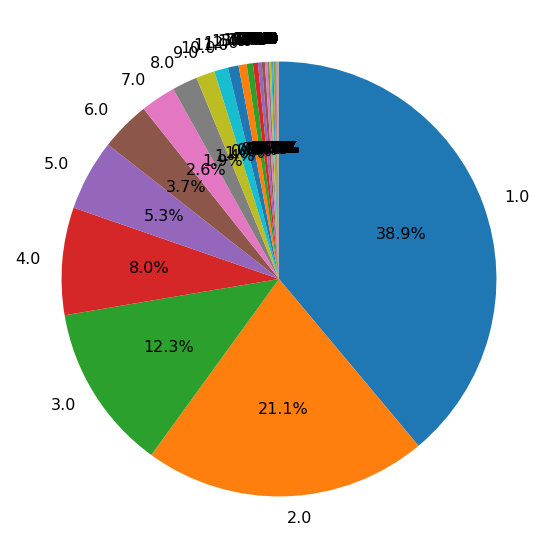

In [38]:
#繪製圓餅圖，發現只購買1、2種商品的客戶佔了60%，造成0和1相差極大
temp3 = df_cus_grp["Buy"].value_counts().index.to_list()
plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 16
plt.pie(df_cus_grp["Buy"].value_counts().sort_values(ascending=False), 
        labels = temp3, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [39]:
#列出只購買1~5種的商品的客戶
for i in range(1,6):
    print(i)
    print(df_cus_grp[df_cus_grp.Buy==i].count())

1
customer_id    223005
Buy            223005
dtype: int64
2
customer_id    120782
Buy            120782
dtype: int64
3
customer_id    70714
Buy            70714
dtype: int64
4
customer_id    45790
Buy            45790
dtype: int64
5
customer_id    30282
Buy            30282
dtype: int64


In [40]:
#篩選只購買2種以內商品的客戶
del_cus = df_cus_grp[df_cus_grp['Buy'] <=2]
del_cus['del']=1
del_cus = del_cus.drop("Buy", axis = 1)
del_cus = del_cus.reset_index(drop=True)
del_cus

C:\Users\a2751\AppData\Local\Temp\ipykernel_13976\2946295808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_cus['del']=1


,customer_id,del
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1
3,00008469a21b50b3d147c97135e25b4201a8c58997f787...,1
4,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,1
...,...,...
343782,ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed...,1
343783,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1
343784,ffff64f7850d4268016db8db3d48bf5433db2a926ba71b...,1
343785,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,1


In [41]:
#刪除只購買2種以內商品的客戶(一)
df = pd.merge(df,del_cus,on='customer_id',how='outer')
df

,customer_id,article_id,Buy,del
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,NaN
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0399223001,0.0,NaN
2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245018,0.0,NaN
3,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0610776002,0.0,NaN
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0484398001,0.0,NaN
...,...,...,...,...
140255773,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0417951001,0.0,1.0
140255774,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0395127001,0.0,1.0
140255775,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0664074007,0.0,1.0
140255776,aea90f0352a350f0ea15a1a54a7795c9ef1a74a86af2fb...,0695632001,0.0,1.0


In [42]:
#刪除只購買2種以內商品的客戶(二)
index_to_rm = df[df['del'] ==1].index.tolist()
df = df.drop(index_to_rm, axis=0)
df.drop('del',axis=1,inplace=True)
del index_to_rm
df

,customer_id,article_id,Buy
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0399223001,0.0
2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245018,0.0
3,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0610776002,0.0
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0484398001,0.0
...,...,...,...
140201338,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0417951001,0.0
140201339,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0395127001,0.0
140201340,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0664074007,0.0
140201341,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0695632001,0.0


In [43]:
#0和1的數量
print(pd.value_counts(df['Buy']))

0.0    55007111
1.0     1333846
Name: Buy, dtype: int64


# label版

## 加入客戶屬性

In [44]:
#合併產生客戶屬性
df_label = pd.merge(df,data_cus,on='customer_id',how='inner')

In [45]:
df_label

,customer_id,article_id,Buy,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_class,attribute
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman
1,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0399223001,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman
2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245018,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman
3,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0610776002,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0484398001,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman
...,...,...,...,...,...,...,...,...,...,...,...
56340952,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0417951001,0.0,0.0,0.0,ACTIVE,None,31.0,e53caf994409028e20cda492d895e12e4aa37a9d774d98...,2,Woman
56340953,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0395127001,0.0,0.0,0.0,ACTIVE,None,31.0,e53caf994409028e20cda492d895e12e4aa37a9d774d98...,2,Woman
56340954,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0664074007,0.0,0.0,0.0,ACTIVE,None,31.0,e53caf994409028e20cda492d895e12e4aa37a9d774d98...,2,Woman
56340955,455fa2393855ac0f19eae8778d0f639196cb87c4bd6af0...,0695632001,0.0,0.0,0.0,ACTIVE,None,31.0,e53caf994409028e20cda492d895e12e4aa37a9d774d98...,2,Woman


## 加入商品屬性

In [46]:
#篩選需要的屬性
df_art = data_art[['article_id','index_name','perceived_colour_value_name','colour_group_name','graphical_appearance_name']]
df_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   article_id                   105542 non-null  object
 1   index_name                   105542 non-null  object
 2   perceived_colour_value_name  105542 non-null  object
 3   colour_group_name            105542 non-null  object
 4   graphical_appearance_name    105542 non-null  object
dtypes: object(5)
memory usage: 4.0+ MB


In [47]:
#合併產生商品屬性
df_label = pd.merge(df_label,df_art,on='article_id',how='inner')

In [48]:
df_label

,customer_id,article_id,Buy,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_class,attribute,index_name,perceived_colour_value_name,colour_group_name,graphical_appearance_name
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,0.0,0.0,ACTIVE,None,22.0,6d98a3ca1370c33de04f4a0c2e81cd9c9e36d9501ca6dc...,1,Woman,Ladieswear,Dark,Black,Solid
1,04a183a27a6877e560e1025216d0a3b40d88668c68366d...,0562245001,1.0,0.0,0.0,ACTIVE,None,24.0,606c2c4df2017af703ae6ed5558eb6839a7df798985df6...,1,Young,Ladieswear,Dark,Black,Solid
2,acc241d1fa741176872220554edc844116b4a74780579b...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,23.0,cc0c6a1515b66db7bff2bd3fe6be3141b1dc3e500c77d5...,1,Young,Ladieswear,Dark,Black,Solid
3,65543816d04fcfee94f9b3a818a207d5dcde77b0323d86...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,34.0,86a9d31f09709a258ec533e73287ea1fc8e75261856c83...,2,Woman,Ladieswear,Dark,Black,Solid
4,6603cfa39dba7179cc7dd0c1da440e573e86bf4cf40364...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,33.0,47aa9db250476e7335633c87c9b592e601cd3044113a48...,2,Woman,Ladieswear,Dark,Black,Solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56340952,0e180eff374a2913c9eadeb6b19567f14e7a3b75866a78...,0688341001,0.0,0.0,0.0,ACTIVE,None,47.0,88771c0373d4c04dea91a31583afe56f4fddb39af075c6...,4,Young,Ladieswear,Dark,Black,Solid
56340953,0ea08ecb317f00bc5f20d0b7afa6ffc6ba952ba0066aad...,0688341001,0.0,0.0,0.0,ACTIVE,None,28.0,ec4661745b2af76c6e250fa200893ef5380b5b9f9cad13...,2,Young,Ladieswear,Dark,Black,Solid
56340954,9d7c9c3eb64ca3876bc72cb9670cc716d799f30cfb1480...,0688341001,0.0,0.0,0.0,ACTIVE,None,45.0,1fba565173d185538eda35c70ea8af98d3bf98901bf89e...,3,Young,Ladieswear,Dark,Black,Solid
56340955,17edf0710f8fdcb9ab5a0744bc8231459736ce240dd68c...,0688341001,0.0,1.0,1.0,ACTIVE,Regularly,18.0,803534d3da2eccdae2e0bcb9237cb7c743ba5aef2a971c...,1,Young,Ladieswear,Dark,Black,Solid


In [49]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56340957 entries, 0 to 56340956
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_id                  object 
 1   article_id                   object 
 2   Buy                          float64
 3   FN                           float64
 4   Active                       float64
 5   club_member_status           object 
 6   fashion_news_frequency       object 
 7   age                          float64
 8   postal_code                  object 
 9   age_class                    object 
 10  attribute                    object 
 11  index_name                   object 
 12  perceived_colour_value_name  object 
 13  colour_group_name            object 
 14  graphical_appearance_name    object 
dtypes: float64(4), object(11)
memory usage: 6.7+ GB


In [50]:
#刪除不需要的欄位
df_label = df_label.drop(['age','postal_code'],axis = 1)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56340957 entries, 0 to 56340956
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_id                  object 
 1   article_id                   object 
 2   Buy                          float64
 3   FN                           float64
 4   Active                       float64
 5   club_member_status           object 
 6   fashion_news_frequency       object 
 7   age_class                    object 
 8   attribute                    object 
 9   index_name                   object 
 10  perceived_colour_value_name  object 
 11  colour_group_name            object 
 12  graphical_appearance_name    object 
dtypes: float64(3), object(10)
memory usage: 5.9+ GB


In [51]:
'''
#匯出pickle
import pickle
with open('data_label.pickle','wb') as fw:
    pickle.dump(df_label,fw)
'''

"\n#匯出pickle\nimport pickle\nwith open('data_label.pickle','wb') as fw:\n    pickle.dump(df_label,fw)\n"

## UnderSampling

In [52]:
#篩選0的資料
df_label_0 = df_label[df_label['Buy']==0]
df_label_0.head()

,customer_id,article_id,Buy,FN,Active,club_member_status,fashion_news_frequency,age_class,attribute,index_name,perceived_colour_value_name,colour_group_name,graphical_appearance_name
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,0.0,0.0,ACTIVE,None,1,Woman,Ladieswear,Dark,Black,Solid
2,acc241d1fa741176872220554edc844116b4a74780579b...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,1,Young,Ladieswear,Dark,Black,Solid
3,65543816d04fcfee94f9b3a818a207d5dcde77b0323d86...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,2,Woman,Ladieswear,Dark,Black,Solid
4,6603cfa39dba7179cc7dd0c1da440e573e86bf4cf40364...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,2,Woman,Ladieswear,Dark,Black,Solid
5,20be29e692d61dabcf4b13db8d7fb16c156cbec29c4cb8...,0562245001,0.0,1.0,1.0,ACTIVE,Regularly,1,Woman,Ladieswear,Dark,Black,Solid


In [53]:
#打亂資料
from sklearn.utils import shuffle
df_label_0 = shuffle(df_label_0)
df_label_0.head()


KeyboardInterrupt



In [ ]:
#0取樣至1的數量
df_label_0=df_label_0.sample(n=1333846,random_state=123,axis=0,replace=False)

In [ ]:
#篩選1的資料
df_label_1 = df_label[df_label['Buy']==1]
df_label_1

In [ ]:
#合併0和1
df_label_shuffle = pd.concat([df_label_0,df_label_1],ignore_index=True)
del df_label_0
del df_label_1
df_label_shuffle

In [ ]:
#打亂資料
from sklearn.utils import shuffle
df_label_shuffle = shuffle(df_label_shuffle)
df_label_shuffle

In [ ]:
df_label_shuffle.info()

In [ ]:
#匯出csv至colab跑模型
df_label_shuffle.to_csv('shuffle_label.csv',index=False)

In [54]:
del (df,data_cus,data_art,df_art,df_tran)

# OneHot版本

## 加入屬性

In [56]:
#One-Hot-encoding
df_tem = df_label[['club_member_status','fashion_news_frequency','age_class','attribute',\
              'index_name','perceived_colour_value_name','colour_group_name','graphical_appearance_name']]
data_dum = pd.get_dummies(df_tem)
del df_tem
pd.DataFrame(data_dum)

,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly,age_class_1,age_class_2,age_class_3,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56340952,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56340953,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
56340954,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
56340955,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
#刪除不需要的欄位並左右合併onehot
df_onehot = df_label.copy()
del df_label
df_onehot = df_onehot.drop(['club_member_status','fashion_news_frequency','age_class',\
                           'attribute','graphical_appearance_name','colour_group_name',\
                           'perceived_colour_value_name','index_name'],axis = 1)
df_onehot=pd.concat([df_onehot,data_dum],axis=1)
df_onehot

,customer_id,article_id,Buy,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,04a183a27a6877e560e1025216d0a3b40d88668c68366d...,0562245001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,acc241d1fa741176872220554edc844116b4a74780579b...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65543816d04fcfee94f9b3a818a207d5dcde77b0323d86...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6603cfa39dba7179cc7dd0c1da440e573e86bf4cf40364...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56340952,0e180eff374a2913c9eadeb6b19567f14e7a3b75866a78...,0688341001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56340953,0ea08ecb317f00bc5f20d0b7afa6ffc6ba952ba0066aad...,0688341001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56340954,9d7c9c3eb64ca3876bc72cb9670cc716d799f30cfb1480...,0688341001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56340955,17edf0710f8fdcb9ab5a0744bc8231459736ce240dd68c...,0688341001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56340957 entries, 0 to 56340956
Data columns (total 62 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   customer_id                                 object 
 1   article_id                                  object 
 2   Buy                                         float64
 3   FN                                          float64
 4   Active                                      float64
 5   club_member_status_ACTIVE                   uint8  
 6   club_member_status_LEFT CLUB                uint8  
 7   club_member_status_None                     uint8  
 8   club_member_status_PRE-CREATE               uint8  
 9   fashion_news_frequency_Monthly              uint8  
 10  fashion_news_frequency_None                 uint8  
 11  fashion_news_frequency_Regularly            uint8  
 12  age_class_1                                 uint8  
 13  age_class_2              

## UnderSampling

In [60]:
#篩選0的資料
df_onehot_0 = df_onehot[df_onehot['Buy']==0]
df_onehot_0.head()

,customer_id,article_id,Buy,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
0,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0562245001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,acc241d1fa741176872220554edc844116b4a74780579b...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65543816d04fcfee94f9b3a818a207d5dcde77b0323d86...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6603cfa39dba7179cc7dd0c1da440e573e86bf4cf40364...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,20be29e692d61dabcf4b13db8d7fb16c156cbec29c4cb8...,0562245001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
#打亂資料
from sklearn.utils import shuffle
df_onehot_0 = shuffle(df_onehot_0)
df_onehot_0.head()

,customer_id,article_id,Buy,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
13290218,1ca826e65e6ede074b7a2b9090c461995570be1823f7fd...,0179950001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
252229,cbf21d4b97232a936c727789c2b04fdca571f6ba4ee739...,0399223001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47693818,db8c1b8c51e8bc8ee8bb8db54da3b96694585dbf7b270d...,0569996004,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16627329,c897ab68d50a18e5786e38f6cb2eeab600b893e3a41c36...,0399087010,0.0,1.0,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34012681,4a14eba927c541ecd8acfa7435ba73f7c832712e9b6da9...,0452618001,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
#0取樣至1的數量
df_onehot_0=df_onehot_0.sample(n=1333846,random_state=123,axis=0,replace=False)

In [63]:
#篩選1的資料
df_onehot_1 = df_onehot[df_onehot['Buy']==1]
df_onehot_1

,customer_id,article_id,Buy,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
1,04a183a27a6877e560e1025216d0a3b40d88668c68366d...,0562245001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2524f04e56890635b2571dca56fdab1c44b855178c5e28...,0562245001,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,2524f04e56890635b2571dca56fdab1c44b855178c5e28...,0562245001,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,2524f04e56890635b2571dca56fdab1c44b855178c5e28...,0562245001,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,2524f04e56890635b2571dca56fdab1c44b855178c5e28...,0562245001,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56329618,a6e078c2779b841a0512d8d92e9cf0e6cc200be3fcb2e2...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56329619,f528967f0c5d198f34b954a9591ce562cc1aeb809d765e...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56329620,f528967f0c5d198f34b954a9591ce562cc1aeb809d765e...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56329621,25b4a3135101a5e7458d2c169abe231912785e4f46d846...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
#合併0和1
df_onehot_shuffle = pd.concat([df_onehot_0,df_onehot_1],ignore_index=True)
del df_onehot_0
del df_onehot_1
df_onehot_shuffle

,customer_id,article_id,Buy,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_None,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,...,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Embroidery,graphical_appearance_name_Melange,graphical_appearance_name_Neps,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent
0,d107e60d367e07c18717c09a50105d255e326fa23f9258...,0507909001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,e69c56e9d7776294edbd983396abcff350beddc7acb7bc...,0399087015,0.0,0.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,13fa44631b797b633ffb2014568bb53635c1717fa6539d...,0678342001,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,ab85b24e110ee8b58d3814197d31b8e17549c2fa3a0193...,0399136061,0.0,1.0,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1095b1164031487b3636c08f937d2905bfa00b8bc85641...,0301227002,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667687,a6e078c2779b841a0512d8d92e9cf0e6cc200be3fcb2e2...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2667688,f528967f0c5d198f34b954a9591ce562cc1aeb809d765e...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2667689,f528967f0c5d198f34b954a9591ce562cc1aeb809d765e...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2667690,25b4a3135101a5e7458d2c169abe231912785e4f46d846...,0688341001,1.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
'''
#匯出csv至colab跑模型
df_onehot_shuffle.to_csv('shuffle_onehot.csv',index=False)
'''